In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Считайте датасет GlobalLandTemperaturesByMajorCity.csv

In [6]:
import pandas as pd
df=pd.read_csv('GLT.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### Задание 1 Создайте в вашем датасете новую колонку 'Disp' в которой будут содержаться значения дисперсии, то есть возведенной в квадрат колонки AverageTemperatureUncertainty, и переставьте ее в крайний левый столбец, перед dt.

In [3]:
df.insert(0, 'Disp', df['AverageTemperatureUncertainty'].apply(lambda x: x*x))
df.head()

,Disp,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,2.059225,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1.855044,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,2.598544,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1.923769,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1.440000,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### Задание 2 Рассчитайте сколько городов есть в датасете для каждой страны. Для этого создайте список всех стран и затем напишите функцию, которая рассчитывала бы для каждой страны их количество. Результат можно представить или в виде словаря, где по ключу - стране будет выдаваться число городов или в любом другом виде.

In [5]:
df.groupby('Country')['City'].agg([pd.Series.nunique])

,nunique
Country,
Afghanistan,1
Angola,1
Australia,2
Bangladesh,1
Brazil,6
Burma,1
Canada,2
Chile,1
China,16


In [27]:
a=list(df['Country'].unique())
for i in range(len(a)):
    b=list(df[df['Country']==a[i]]['City'].unique())
    print(a[i], len(b))

Côte D'Ivoire 1
Ethiopia 1
India 14
Syria 1
Egypt 3
Turkey 3
Iraq 1
Thailand 1
Brazil 6
Germany 1
Colombia 2
South Africa 2
Morocco 1
China 16
United States 3
Senegal 1
Tanzania 1
Bangladesh 1
Pakistan 3
Zimbabwe 1
Vietnam 1
Nigeria 3
Indonesia 2
Saudi Arabia 2
Afghanistan 1
Ukraine 1
Congo (Democratic Republic Of The) 1
Peru 1
United Kingdom 1
Angola 1
Spain 1
Philippines 1
Iran 1
Australia 2
Mexico 1
Somalia 1
Canada 2
Russia 2
Japan 2
Kenya 1
France 1
Burma 1
Italy 1
Chile 1
Dominican Republic 1
South Korea 1
Singapore 1
Taiwan 1
Sudan 1


In [33]:
a=list(df['Country'].unique())
dic={}
for i in range(len(a)):
    b=list(df[df['Country']==a[i]]['City'].unique())
    dic[a[i]]=len(b)
print(dic)
dic['India']

{"Côte D'Ivoire": 1, 'Ethiopia': 1, 'India': 14, 'Syria': 1, 'Egypt': 3, 'Turkey': 3, 'Iraq': 1, 'Thailand': 1, 'Brazil': 6, 'Germany': 1, 'Colombia': 2, 'South Africa': 2, 'Morocco': 1, 'China': 16, 'United States': 3, 'Senegal': 1, 'Tanzania': 1, 'Bangladesh': 1, 'Pakistan': 3, 'Zimbabwe': 1, 'Vietnam': 1, 'Nigeria': 3, 'Indonesia': 2, 'Saudi Arabia': 2, 'Afghanistan': 1, 'Ukraine': 1, 'Congo (Democratic Republic Of The)': 1, 'Peru': 1, 'United Kingdom': 1, 'Angola': 1, 'Spain': 1, 'Philippines': 1, 'Iran': 1, 'Australia': 2, 'Mexico': 1, 'Somalia': 1, 'Canada': 2, 'Russia': 2, 'Japan': 2, 'Kenya': 1, 'France': 1, 'Burma': 1, 'Italy': 1, 'Chile': 1, 'Dominican Republic': 1, 'South Korea': 1, 'Singapore': 1, 'Taiwan': 1, 'Sudan': 1}


14

### Задание 3 С помощью группировок получите новый датасет data_month. Для этого вам необходимо разделить с помощью функции Lambda x колонку dt, на три колонки, дни, месяцы, годы. В результате в data_month должны хранится значения средней месячной температуры за весь период наблюдения для каждого города (то есть для каждого города 12 значений)

In [7]:
df.insert(0, 'Year', df['dt'].apply(lambda x: int(x[0:4])))
df

,Year,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...,...
239172,2013,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [8]:
df.insert(1, 'Month', df['dt'].apply(lambda x: int(x[5:7])))
df

,Year,Month,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849,1,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849,2,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849,3,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849,4,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849,5,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...,...,...
239172,2013,5,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013,6,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013,7,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013,8,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [9]:
data_month=df.groupby(by=['City', 'Month'])['AverageTemperature'].agg(np.mean)
data_month

City     Month
Abidjan  1        26.629107
         2        27.781385
         3        28.049333
         4        27.457480
         5        26.682174
                    ...    
Xian     8        22.916503
         9        17.579096
         10       11.580000
         11        4.840198
         12       -0.940659
Name: AverageTemperature, Length: 1200, dtype: float64

### Задание 4 Создайте датасет содержащий среднегодовые значения температуры для Москвы и Санкт=Петербурга. И выведети график ее изменения за весь период наблюдений для двух городов одновременно.

In [12]:
ru=df[(df['City']=='Moscow') | (df['City']=='Saint Petersburg')]
ru=ru[ru['Year']>=1800]
ru

,Year,Month,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
155870,1800,1,1800-01-01,-10.905,2.345,Moscow,Russia,55.45N,36.85E
155871,1800,2,1800-02-01,-9.600,3.269,Moscow,Russia,55.45N,36.85E
155872,1800,3,1800-03-01,-7.635,3.707,Moscow,Russia,55.45N,36.85E
155873,1800,4,1800-04-01,5.957,2.011,Moscow,Russia,55.45N,36.85E
155874,1800,5,1800-05-01,11.289,2.024,Moscow,Russia,55.45N,36.85E
...,...,...,...,...,...,...,...,...,...
196675,2013,5,2013-05-01,12.355,0.195,Saint Petersburg,Russia,60.27N,29.19E
196676,2013,6,2013-06-01,17.185,0.413,Saint Petersburg,Russia,60.27N,29.19E
196677,2013,7,2013-07-01,17.234,0.273,Saint Petersburg,Russia,60.27N,29.19E
196678,2013,8,2013-08-01,17.153,0.279,Saint Petersburg,Russia,60.27N,29.19E


In [13]:
ru=ru.groupby(by=['City', 'Year'])['AverageTemperature'].agg(np.mean)
ru

City              Year
Moscow            1800    3.796333
                  1801    4.739583
                  1802    4.484167
                  1803    3.346167
                  1804    3.915250
                            ...   
Saint Petersburg  2009    5.177417
                  2010    4.239917
                  2011    6.056250
                  2012    4.661000
                  2013    6.058750
Name: AverageTemperature, Length: 428, dtype: float64

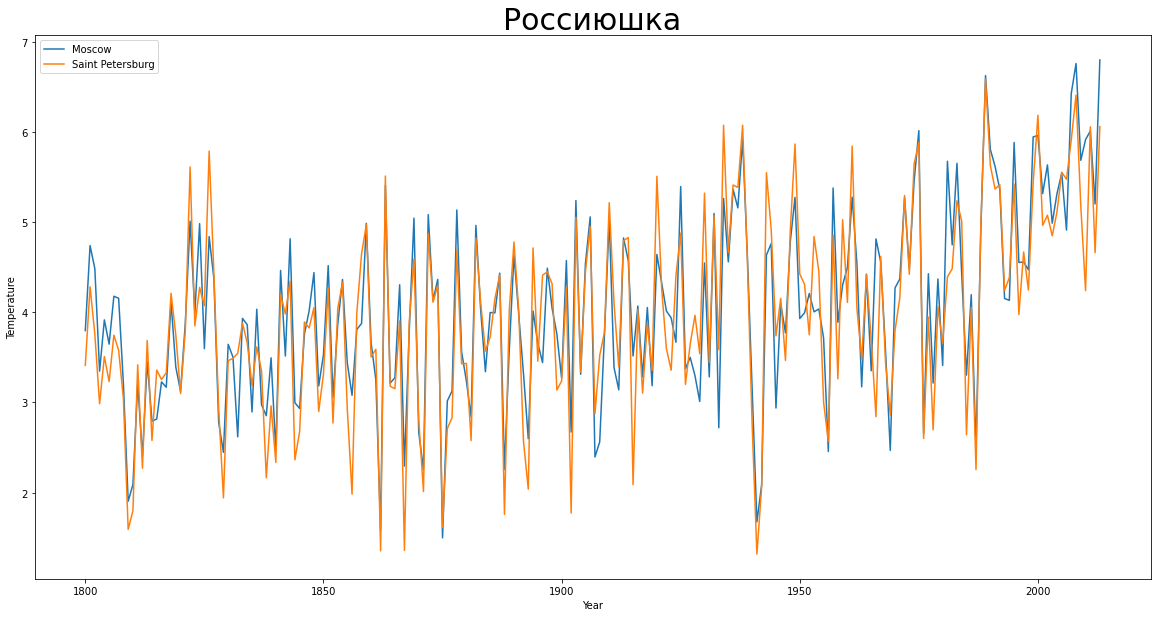

In [14]:
ru['Moscow'].plot.line(x='dt', y='AverageTemperature', label='Moscow', figsize=[20,10])
ru['Saint Petersburg'].plot.line(x='dt', y='AverageTemperature', label='Saint Petersburg', figsize=[20,10])
plt.title('Россиюшка', fontsize=30)
plt.ylabel('Temperature')
plt.legend()

### Задание 5 Пересохраните исходный датасет data, так, чтобы там остались только даты, начиная с 1 января 2000 года. Сохраните список с городами США в переменную `USA_cities`. В списке не должно быть повторяющихся значений

In [16]:
new=df[df['Year']>=2000]
new

,Year,Month,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1812,2000,1,2000-01-01,27.293,0.331,Abidjan,Côte D'Ivoire,5.63N,3.23W
1813,2000,2,2000-02-01,27.685,0.267,Abidjan,Côte D'Ivoire,5.63N,3.23W
1814,2000,3,2000-03-01,29.061,0.224,Abidjan,Côte D'Ivoire,5.63N,3.23W
1815,2000,4,2000-04-01,28.162,0.478,Abidjan,Côte D'Ivoire,5.63N,3.23W
1816,2000,5,2000-05-01,27.547,0.509,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...,...,...
239172,2013,5,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013,6,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013,7,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013,8,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [17]:
a=list(df[df['Country']=='United States']['City'].unique())
a

['Chicago', 'Los Angeles', 'New York']

### Задание 6 Постройте график - боксплоты, показывающий срденегодовую температуру разных городов США (один боксплот - улей на каждый город

Text(0.5, 1.0, 'Средняя температура в городах США')

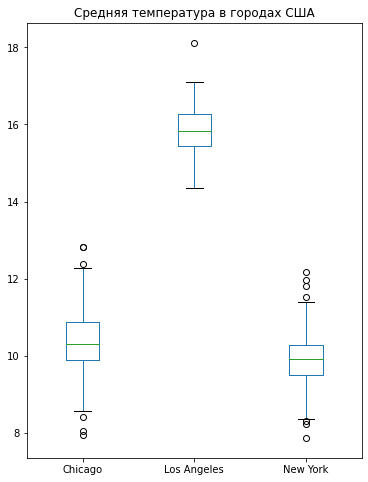

In [24]:
us=df[(df['Country']=='United States') & (df['Year']>1879)]
us=us.groupby(by=['City', 'Year'], as_index=False)['AverageTemperature'].agg(np.mean)
us=us.pivot(index='Year', columns='City', values='AverageTemperature')
us.plot.box(vert=True, figsize=[6,8])
plt.title('Средняя температура в городах США')